In [102]:
from __future__ import print_function

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

BASE_PATH = "/home/dsavenk/Projects/octiron/"
LIVEQA_DATA_PATH = BASE_PATH + "data/liveqa/"
LIVEQA_RESULTS_DATA_PATH = LIVEQA_DATA_PATH + "results_15/"
JUDGED_RESULTS_FILE = LIVEQA_RESULTS_DATA_PATH + "emory-Out-of-mEmory"
ANSWERS_FILE = LIVEQA_RESULTS_DATA_PATH + "emory-answers"
QIDS_FILE = LIVEQA_DATA_PATH + "liveqa15-trec-qid.txt"
QUESTIONS_FILE = LIVEQA_DATA_PATH + "liveqa15-trec-qna.txt"

In [103]:
import csv

def read_tsv_file(file_path, key_field_extractor, restkey="NONE"):
    answers = dict()
    with open(file_path, 'r') as input_file:
        input_tsv = csv.DictReader(input_file, delimiter='\t', restkey=restkey)
        for row in input_tsv:
            answers[key_field_extractor(row)] = row
    return answers

def read_judged_results_file(file_path):
    return read_tsv_file(file_path, lambda row: row["QID"])

def read_answers_file(file_path):
    return read_tsv_file(file_path, lambda row: row["QID"][3:])

def get_ya_web_scores(judged_results, answers):
    scores = {"ya": [], "web": [], "idon'tknow": []}
    for qid, result in judged_results.iteritems():
        answer = answers[qid]
        url = answer["RESOURCES"]
        is_yahoo_answers = "ya" if "answers.yahoo.com" in url else "web" if url else "idon'tknow"
        scores[is_yahoo_answers].append(int(result["SCORE"]))
    return scores

def read_questions_file(file_path):
    res = read_tsv_file(file_path, lambda row: row["QID"], restkey="ANSWERS")
    del res['']
    return res

def read_qids_file(file_path):
    with open(file_path, 'r') as input:
        return map(str.strip, input.readlines())

In [104]:
# Drawing pie chart
import matplotlib.pyplot as plt

def plot_pie_chart(sizes, labels, title="", remove_small=False, small_percent=0.01, angle=90):
    if remove_small:
        new_sizes = []
        new_labels = []
        other_size = 0
        total = sum(sizes)
        for size, label in zip(sizes, labels):
            if 1.0 * size / total <= small_percent:
                other_size += size
            else:
                new_sizes.append(size)
                new_labels.append(label)
        new_sizes.append(other_size)
        new_labels.append("Other")
        sizes = new_sizes
        labels = new_labels
    sizes, labels = zip(*sorted(zip(sizes, labels), key=operator.itemgetter(0)))
    
    #cmap = plt.cm.prism
    #colors = cmap(np.linspace(0., 1., len(labels)))
    colors = ['r', 'g', 'b', 'm', 'c', 'y', 'w', 'lightgreen', 'crimson']
    pie_wedge_collection = plt.pie(sizes, colors=colors, labels=labels, autopct='%1.2f%%', shadow=True, startangle=angle, labeldistance=1.05)
    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
    plt.axis('equal')
    plt.title(title, y=1.08)
    plt.show()



In [105]:
judged_results = read_judged_results_file(JUDGED_RESULTS_FILE)
answers = read_answers_file(ANSWERS_FILE)
questions = read_questions_file(QUESTIONS_FILE)
qids = read_qids_file(QIDS_FILE)
scores = get_ya_web_scores(judged_results, answers)


# Answer statistics

# Number of answers
Yahoo!Answers: 513	Web:340	No answer:31
# Average score:
Yahoo!Answers: 1.95712	Web:1.50000
# Number of answers with score > 2
Yahoo!Answers: 153	Web:53


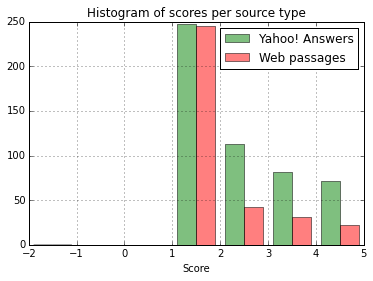

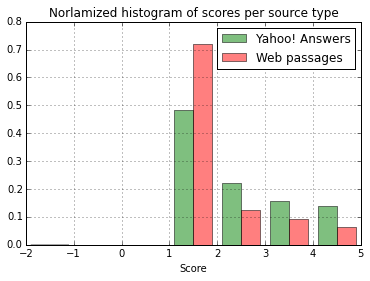

In [106]:
print("# Number of answers\nYahoo!Answers: %d\tWeb:%d\tNo answer:%d" % (len(scores["ya"]), len(scores["web"]), len(scores["idon'tknow"])))
print("# Average score:\nYahoo!Answers: %.5f\tWeb:%.5f" % (1.0 * sum(scores["ya"]) / len(scores["ya"]), 1.0 * sum(scores["web"]) / len(scores["web"])))
print("# Number of answers with score > 2\nYahoo!Answers: %d\tWeb:%d" % (len([score for score in scores["ya"] if score > 2]), len([score for score in scores["web"] if score > 2])))

# the histogram of the data
%matplotlib inline
plt.hist((scores["ya"], scores["web"]), bins=range(-2, 6), color=('green', 'red'), alpha=0.5, label=("Yahoo! Answers", "Web passages"))
plt.xlabel('Score')
plt.title('Histogram of scores per source type')
plt.legend()
plt.grid(True)

plt.figure()
plt.hist((scores["ya"], scores["web"]), normed=True, bins=range(-2, 6), color=('green', 'red'), alpha=0.5, label=("Yahoo! Answers", "Web passages"))
plt.xlabel('Score')
plt.title('Norlamized histogram of scores per source type')
plt.legend()
plt.grid(True)

plt.show()

In [107]:
import operator
answers_by_domain = dict()
for qid, result in judged_results.iteritems():
    answer = answers[qid]
    url = answer["RESOURCES"]
    if url:
        start = url.find("://")
        end = url.find("/", start + 3)
        if end == -1:
            end = len(url) 
        domain = url[start + 3:end]
        if domain not in answers_by_domain:
            answers_by_domain[domain] = [0, []]
        answers_by_domain[domain][0] += 1
        answers_by_domain[domain][1].append(int(result["SCORE"]))
domains = sorted(answers_by_domain.items(), key=operator.itemgetter(1), reverse=True)
print("\n".join(map(str, domains[:20])))

('answers.yahoo.com', [509, [2, 4, 4, 2, 4, 4, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 4, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1, 1, 4, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 4, 1, 1, 4, 1, 3, 2, 4, 4, 1, 1, 3, 1, 4, 4, 2, 4, 2, 3, 4, 3, 1, 4, 1, 1, 2, 2, 1, 4, 2, 3, 3, 1, 2, 1, 2, 2, 1, 1, 4, 1, 2, 1, 4, 4, 1, 1, 2, 3, 3, 1, 4, 1, 4, 2, 1, 1, 1, 2, 1, 2, 3, 4, 1, 4, 1, 4, 3, 3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 1, 1, 1, 1, 4, 4, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 4, 2, 1, 4, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 4, 3, 1, 3, 1, 2, 2, 4, 3, 3, 1, 1, 3, 1, 2, 2, 4, 2, 1, 1, 4, 1, 2, 4, 1, 4, 2, 4, 1, 2, 1, 4, 2, 1, 1, 4, 1, 3, 2, 4, 1, 1, 4, 1, 3, 1, 1, 3, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3, 2, 1, 4, 1, 3, 4, 2, 1, 3, 4, 2, 4, 1, 1, 4, 1, 1, 3, 1, 2, 1, 2, 2, 1, 4, 1, 1, 2, 2, 3, 2, 4, 1, 2, 2, 4, 3, 1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 1, 3, 2, 1,

# Question statistics

Questions total: 1087
Questions downloaded: 856
Categories frequency:
[('Health', 264), ('Computers & Internet', 131), ('Sports', 94), ('Beauty & Style', 93), ('Arts & Humanities', 92), ('Pets', 80), ('Travel', 47), ('Home & Garden', 45), ('Politics & Government', 2), ('Society & Culture', 2), ('Family & Relationships', 1), ('Games & Recreation', 1), ('Local Businesses', 1), ('Cars & Transportation', 1), ('Yahoo Products', 1), ('Social Science', 1)]


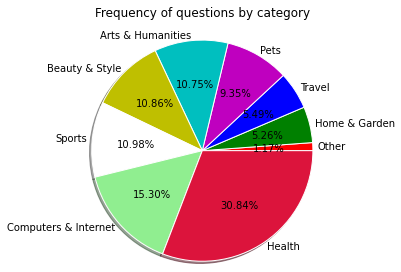

Subcategories frequency:
[('Diet & Fitness', 62), ('Diseases & Conditions', 40), ('Internet', 37), ('Dogs', 37), ("Women's Health", 36), ('Fashion & Accessories', 34), ('Hardware', 34), ('Software', 32), ("Men's Health", 31), ('Books & Authors', 30), ('History', 29), ('Hair', 28), ('Mental Health', 27), ('General Health Care', 25), ('Dental', 21), ('Cats', 17), ('Maintenance & Repairs', 16), ('Asia Pacific', 16), ('Visual Arts', 15), ('Skin & Body', 15), ('Other - Health', 14), ('Fantasy Sports', 13), ('Wrestling', 13), ('Baseball', 13), ('Cleaning & Laundry', 12), ('Football (American)', 12), ('Programming & Design', 12), ('United States', 10), ('Other - Beauty & Style', 8), ('Makeup', 8), ('Running', 8), ('Computer Networking', 8), ('Optical', 7), ('Outdoor Recreation', 7), ('Rodents', 6), ('Fish', 6), ('Garden & Landscape', 6), ('Philosophy', 5), ('Security', 5), ('Other - Pets', 5), ('Birds', 5), ('Theater & Acting', 4), ('Do It Yourself (DIY)', 4), ('Volleyball', 4), ('Africa & Mi

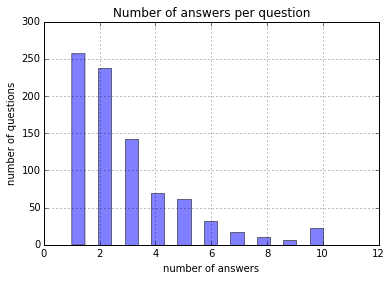

In [108]:
print("Questions total: %d" % len(qids))
print("Questions downloaded: %d" % len(questions.keys()))

questions_by_category = dict()
questions_by_subcategory = dict()
has_best_answer = 0
has_answer = 0
no_answer = 0
answers_per_question = []
for question in questions.itervalues():
    categories = question["CATEGORY"].split(',')
    category = categories[0]
    subcategory = categories[1] if len(categories) > 1 else categories[0]
    if question["BEST_ANSWER"]:
        has_best_answer += 1 
        has_answer += 1
    elif question["ANSWERS"]:
        has_answer += 1
    else:
        no_answer += 1
    answers_per_question.append(len(question["ANSWERS"]) + (1 if question["BEST_ANSWER"] else 0))
    if category not in questions_by_category:
        questions_by_category[category] = 0
    questions_by_category[category] += 1
    if subcategory not in questions_by_subcategory:
        questions_by_subcategory[subcategory] = 0
    questions_by_subcategory[subcategory] += 1

categories = sorted(questions_by_category.items(), key=operator.itemgetter(1), reverse=True)
print("Categories frequency:\n%s" % categories)
categories = dict(categories)
plot_pie_chart(categories.values(), categories.keys(), remove_small=True, small_percent=0.05, angle=0, title="Frequency of questions by category")

subcategories = sorted(questions_by_subcategory.items(), key=operator.itemgetter(1), reverse=True)
print("Subcategories frequency:\n%s" % subcategories)
print("Questions with the best answer: %d" % has_best_answer)
print("Questions with the some answer: %d" % has_answer)
print("Questions without answer: %d" % no_answer)

plt.hist(answers_per_question, bins=19, color="blue", alpha=0.5)
plt.xlabel('number of answers')
plt.ylabel('number of questions')
plt.title('Number of answers per question')
plt.legend()
plt.grid(True)

plt.show()